In [1]:
%pylab
%matplotlib inline
import numpy as np
import pandas as pd
import os
import csv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import apriori

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Ejercicio 1:


 En el archivo retail.csv hay 18.000 tickets de compra anonimizados.
 
 Cuestiones:
 1. Obtener los conjuntos de dos, tres y cuatro elementos con mayor soporte.
 2. Utilizando como soporte mínimo el obtenido en paso anterior para el conjunto de tres elementos, obtener todas las reglas de asociación con confianza de 0,8.
 3. Utilizando como soporte mínimo el obtenido en el primer paso para el conjunto de cuatro elementos, obtener todas las reglas de asociación con confianza de 0,5.

In [2]:
# Se importan los datos
datos = csv.reader(open("retail.csv","r"))
retail = []
for row in datos:
    retail.append(row)

#### 1. Obtener los conjuntos de dos, tres y cuatro elementos con mayor soporte.


Se utiliza el algoritmo apriori:

In [3]:
F, soporte = apriori.apriori(retail, min_support = 0.01, verbose = True)


{8978}:  sup = 0.019
{3966}:  sup = 0.01
{3270}:  sup = 0.01
{2238}:  sup = 0.016
{1859}:  sup = 0.019
{1715}:  sup = 0.017
{1578}:  sup = 0.01
{1344}:  sup = 0.017
{1327}:  sup = 0.038
{1233}:  sup = 0.011
{1198}:  sup = 0.02
{1146}:  sup = 0.021
{1121}:  sup = 0.021
{1034}:  sup = 0.015
{1004}:  sup = 0.012
{976}:  sup = 0.014
{956}:  sup = 0.01
{855}:  sup = 0.012
{846}:  sup = 0.013
{824}:  sup = 0.016
{783}:  sup = 0.016
{769}:  sup = 0.017
{749}:  sup = 0.014
{740}:  sup = 0.013
{677}:  sup = 0.012
{647}:  sup = 0.012
{604}:  sup = 0.025
{592}:  sup = 0.012
{589}:  sup = 0.014
{570}:  sup = 0.01
{533}:  sup = 0.018
{522}:  sup = 0.016
{475}:  sup = 0.029
{438}:  sup = 0.024
{352}:  sup = 0.023
{338}:  sup = 0.015
{310}:  sup = 0.034
{301}:  sup = 0.013
{286}:  sup = 0.012
{271}:  sup = 0.02
{270}:  sup = 0.016
{255}:  sup = 0.018
{249}:  sup = 0.013
{237}:  sup = 0.034
{225}:  sup = 0.027
{208}:  sup = 0.014
{201}:  sup = 0.015
{189}:  sup = 0.013
{185}:  sup = 0.013
{179}:  sup 

* {48,39} es el conjunto de dos elementos con mayor soporte = 0.3
* {41, 48, 39} es el conjunto de tres elementos con mayor soporte = 0.12
* {48, 39, 38, 41} es el conjunto de cuatro elementos con mayor soporte = 0.034


#### 2.Utilizando como soporte mínimo el obtenido en paso anterior para el conjunto de tres elementos, obtener todas las reglas de asociación con confianza de 0.8

El soporte mínimo utilizado es $0.12$:

In [4]:
F, soporte = apriori.apriori(retail, min_support=0.12, verbose=False)
H = apriori.generate_rules(F, soporte, min_confidence=0.8, verbose=True)

{48, 41} ---> {39}:  conf = 0.812, sup = 0.123


Se interpreta esto como que si el cliente compró los productos {48,41} juntos, también compró el producto 39 en el 81% de los casos. Esto sucede en un 12% de los casos analizados.

#### 3.Utilizando como soporte mínimo el obtenido en el primer paso para el conjunto de cuatro elementos, obtener todas las reglas de asociación con confianza de 0,5.

In [5]:
F, soporte = apriori.apriori(retail, min_support=0.034, verbose=False)
H = apriori.generate_rules(F, soporte, min_confidence=0.5, verbose = True)

{32} ---> {39}:  conf = 0.552, sup = 0.098
{32} ---> {48}:  conf = 0.517, sup = 0.092
{170} ---> {38}:  conf = 0.984, sup = 0.039
{41} ---> {48}:  conf = 0.566, sup = 0.151
{39} ---> {48}:  conf = 0.537, sup = 0.3
{48} ---> {39}:  conf = 0.682, sup = 0.3
{38} ---> {39}:  conf = 0.651, sup = 0.113
{41} ---> {39}:  conf = 0.749, sup = 0.2
{32, 41} ---> {48}:  conf = 0.611, sup = 0.036
{32, 41} ---> {39}:  conf = 0.721, sup = 0.043
{39, 32} ---> {48}:  conf = 0.604, sup = 0.059
{48, 32} ---> {39}:  conf = 0.645, sup = 0.059
{39, 41} ---> {48}:  conf = 0.613, sup = 0.123
{48, 41} ---> {39}:  conf = 0.812, sup = 0.123
{38, 41} ---> {48}:  conf = 0.571, sup = 0.04
{38, 39} ---> {48}:  conf = 0.544, sup = 0.061
{48, 38} ---> {39}:  conf = 0.765, sup = 0.061
{38, 41} ---> {39}:  conf = 0.773, sup = 0.054


## Ejercicio 2

En el conjunto de datos Baskeball.csv se encuentran las siguientes columnas para diferentes jugadores:
* X1: altura en pies
* X2: peso en libras
* X3: porcentaje de tiros de campo exitosos
* X4: porcentaje de tiros libres exitosos
* X5: puntos promedio anotados por juego

Intentar predecir el porcentaje de tiros de campo exitosos para un jugador en base al resto de variables utilizando la regresión lineal y regresión LASSO con parámetros alpha de 0.01, 0.1 y 0.5.

Cuestiones:

1. ¿Cuál es el R2 en cada caso?
2. ¿Cuántas variables quedan disponibles al finalizar la regresión LASSO con cada valor de alpha?

In [6]:
# importar los datos:
basketball = pd.read_csv('Basketball.csv')
basketball.columns = ["altura en pies", "peso en libras", "porcentaje de tiros de campo exitosos", "porcentaje de tiros libres exitosos", "puntos promedio anotados por juego"]
basketball.describe()

,altura en pies,peso en libras,porcentaje de tiros de campo exitosos,porcentaje de tiros libres exitosos,puntos promedio anotados por juego
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


Se hace una primera observación de las variables por separado con el histograma y luego la correlación entre ellas:

,altura en pies,peso en libras,porcentaje de tiros de campo exitosos,porcentaje de tiros libres exitosos,puntos promedio anotados por juego
altura en pies,1.000000,0.834324,0.495546,-0.259271,-0.068906
peso en libras,0.834324,1.000000,0.516051,-0.290159,-0.009844
porcentaje de tiros de campo exitosos,0.495546,0.516051,1.000000,-0.018570,0.338760
porcentaje de tiros libres exitosos,-0.259271,-0.290159,-0.018570,1.000000,0.244852
puntos promedio anotados por juego,-0.068906,-0.009844,0.338760,0.244852,1.000000


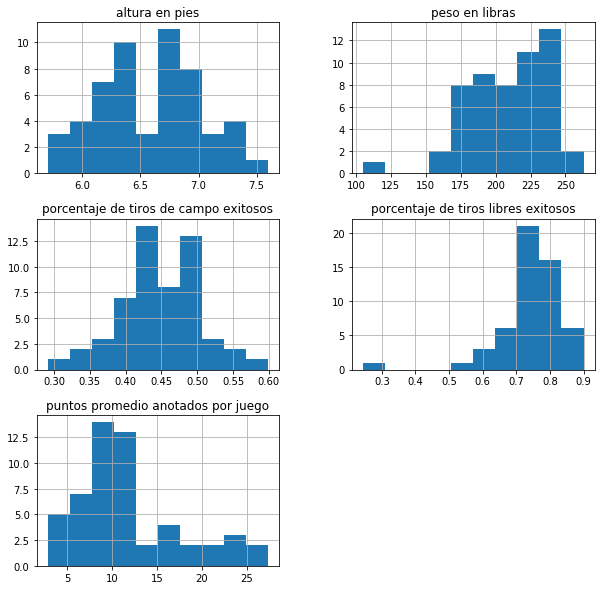

In [7]:
basketball.hist(figsize=(10,10));
basketball.corr()

Se observa que 'peso en libras' es la que más correlación tiene con nuestra variable target seguida de 'altura en pies'. Se verá si haciendo una regresión lineal o una regresión LASSO se podrá crear un modelo bueno para hacer una predicción del porcentaje de tiros libres exitosos a partir del resto de variables.

En primer lugar, se separa la variable target de las variables explicativas:

In [8]:
# separación de las variables objetivo y explicativas
target = 'porcentaje de tiros de campo exitosos'
features = list(basketball.columns)
features.remove('porcentaje de tiros de campo exitosos')

x = basketball[features]
y = basketball[target]

### Regresión Lineal

Mediante una comparativa entre un modelo con término independiente o sin término independiente, vamos a ver cuál de los dos explican la regresión, mayor $R^2$.

In [9]:
model = LinearRegression()
model.fit(x,y)
print('R2 con término independiente:', model.score(x,y))
model_sin = LinearRegression(fit_intercept = False)
model_sin.fit(x,y)
print('R2 sin término independiente:', model_sin.score(x,y))

R2 con término independiente: 0.411865449032
R2 sin término independiente: 0.410791193104


Observamos que con término independiente el modelo se ajusta mejor.

In [10]:
# predicción del modelo
predit_train = model.predict(x)

# Evaluación de R2
print('R2:', model.score(x, y))
print('beta_0:', model.intercept_)
print('beta_1:', model.coef_[0])
print('beta_2:', model.coef_[1])
print('beta_3:',model.coef_[2])
print('beta_4:',model.coef_[3])


R2: 0.411865449032
beta_0: 0.0370424918019
beta_1: 0.0353032646206
beta_2: 0.000554830562716
beta_3: 0.0320573009847
beta_4: 0.00333141873932


En el caso de la regresión Lineal todas las variables se utilizarán en la creación del modelo puesto que todos los coeficientes son diferentes de cero. La recta sería $y = 0.037 + 0.035x_1 + 0005x_2 + 0.032x_4 + 0.003x_5$ siendo las variables definidas anteriormente.
Veamos el residuo:

In [11]:
residuo = sum((model.predict(x) - y)**2) / (2 * len(x))
residuo

0.0009230299817622629

## Regresión Lasso

In [12]:
# alpha = 0.01
model_lasso = Lasso(alpha = 0.01)
model_lasso.fit(x, y)
predit_train = model_lasso.predict(x)
scores = cross_val_score(model_lasso, x, y)
residuo = sum((predit_train - y)**2) / (2 * len(x))
print('R2 con alpha = 0.01 es: ', model_lasso.score(x, y))
print('La media de los R2 es:', scores.mean())
print('Los R2 son: ', scores)
print('beta_0:', model_lasso.intercept_)
print('beta_1:', model_lasso.coef_[0])
print('beta_2:', model_lasso.coef_[1])
print('beta_3:',model_lasso.coef_[2])
print('beta_4:',model_lasso.coef_[3])
print('residuo:', residuo)
print('número de variables disponibles:',len(model_lasso.coef_[model_lasso.coef_ != 0]))
print('=====================')

# alpha = 0.1
model_lasso = Lasso(alpha = 0.1)
model_lasso.fit(x, y)
predit_train = model_lasso.predict(x)
scores = cross_val_score(model_lasso, x, y)
residuo = sum((model.predict(x) - y)**2) / (2 * len(x))
print('R2 con alpha = 0.1 es: ', model_lasso.score(x, y))
print('La media de los R2 es:', scores.mean())
print('Los R2 son: ', scores)
print('beta_0:', model_lasso.intercept_)
print('beta_1:', model_lasso.coef_[0])
print('beta_2:', model_lasso.coef_[1])
print('beta_3:',model_lasso.coef_[2])
print('beta_4:',model_lasso.coef_[3])
print('residuo:', residuo)
print('número de variables disponibles:',len(model_lasso.coef_[model_lasso.coef_ != 0]))
print('=====================')


# alpha = 0.5
model_lasso = Lasso(alpha = 0.5)
model_lasso.fit(x, y)
predit_train = model_lasso.predict(x)
scores = cross_val_score(model_lasso, x, y)
residuo = sum((model.predict(x) - y)**2) / (2 * len(x))
print('R2 con alpha = 0.5 es: ', model_lasso.score(x, y))
print('La media de los R2 es:', scores.mean())
print('Los R2 son: ', scores)
print('beta_0:', model_lasso.intercept_)
print('beta_1:', model_lasso.coef_[0])
print('beta_2:', model_lasso.coef_[1])
print('beta_3:',model_lasso.coef_[2])
print('beta_4:',model_lasso.coef_[3])
print('residuo:', residuo)
print('número de variables disponibles:',len(model_lasso.coef_[model_lasso.coef_ != 0]))

R2 con alpha = 0.01 es:  0.383574053121
La media de los R2 es: 0.247513222135
Los R2 son:  [-0.0431627   0.41470454  0.37099783]
beta_0: 0.212422351194
beta_1: 0.0
beta_2: 0.000958900151005
beta_3: 0.0
beta_4: 0.0030030780963
residuo: 0.0009674310573470757
número de variables disponibles: 2
R2 con alpha = 0.1 es:  0.28736215903
La media de los R2 es: 0.236256928955
Los R2 son:  [ 0.13693951  0.3141996   0.25763167]
beta_0: 0.265629723599
beta_1: 0.0
beta_2: 0.000853724217049
beta_3: 0.0
beta_4: 0.000362856801317
residuo: 0.0009230299817622629
número de variables disponibles: 2
R2 con alpha = 0.5 es:  0.177714068234
La media de los R2 es: 0.112406200038
Los R2 son:  [ 0.10174773  0.17702375  0.05844713]
beta_0: 0.363449135671
beta_1: 0.0
beta_2: 0.000408094104435
beta_3: 0.0
beta_4: 0.0
residuo: 0.0009230299817622629
número de variables disponibles: 1


Conclusiones:
* Observamos que a mayor valor de $\alpha$ peor será el modelo puesto que los $R^2$ son menores.
* Con $\alpha = 0.01$ y $\alpha = 0.1$ las variables que nos quedan disponibles son 'peso en libras' y 'porcentaje de tiros libres exitosos' mientras que con $\alpha = 0.5$ sólo queda disponible la variable 'peso en libras'.
* En todos los modelos el residuo obtenido es bajo. 

## Ejercicio 3

 En el archivo ionosphere.csv hay datos de la ionosfera. Las 34 primeras columnas son valores numéricos y la ultima es una etiqueta de texto con ‘g’ cuando el resultado es bueno y ‘b’ cuando es malo. Importar este conjunto de datos y crear un modelo de clasificación utilizando clasificadores regresión logística, máquinas de vector soporte y k-nn con 3 y 5 vecinos.

Los datos se han de dividir en un conjunto de entrenamiento que contenga el 80% de los datos y otro test con el resto.

In [13]:
%pylab
%matplotlib inline

def metricas_modelos(y_true, y_pred):
    from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve

    # Obtención de matriz de confusión
    confusion_matrix = confusion_matrix(y_true, y_pred)

    print('La matriz de confusión es')
    print(confusion_matrix)

    print('Precisión:', accuracy_score(y_true, y_pred))
    print('Exactitud:', precision_score(y_true, y_pred))
    print('Exhaustividad:', recall_score(y_true, y_pred))
    print('F1:', f1_score(y_true, y_pred))

    false_positive_rate, recall, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(false_positive_rate, recall)

    print('AUC:', auc(false_positive_rate, recall))

    plot(false_positive_rate, recall, 'b')
    plot([0, 1], [0, 1], 'r--')
    title('AUC = %0.2f' % roc_auc)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [14]:
# importar los datos

ionosfera = pd.read_csv('ionosphere.csv',header=None)

# transformar categórico a numérico
resultado = {34:{"g": 1, "b": 0}}
ionosfera.replace(resultado, inplace=True)
ionosfera.head(5)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [15]:
# separación entre variables explicativas y target
target = 34
features = list(ionosfera.columns)
features.remove(34)
x = ionosfera[features]
y = ionosfera[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8,test_size=0.2)


#### Regresión logística

La matriz de confusión es
[[ 81  22]
 [  4 173]]
Precisión: 0.907142857143
Exactitud: 0.887179487179
Exhaustividad: 0.977401129944
F1: 0.930107526882
AUC: 0.881904448467


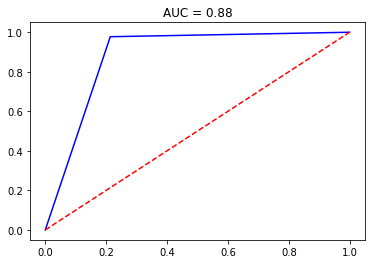

In [16]:
from sklearn.linear_model.logistic import LogisticRegression
# conjunto train
classifier = LogisticRegression().fit(x_train, y_train)
y_pred     = classifier.predict(x_train)
metricas_modelos(y_train, y_pred)



La matriz de confusión es
[[15  8]
 [ 0 48]]
Precisión: 0.887323943662
Exactitud: 0.857142857143
Exhaustividad: 1.0
F1: 0.923076923077
AUC: 0.826086956522


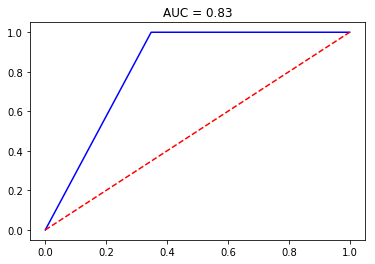

In [17]:
# conjunto test
y_pred = classifier.predict(x_test)

metricas_modelos(y_test, y_pred)

#### Máquinas de soporte

La matriz de confusión es
[[ 90  13]
 [  2 175]]
Precisión: 0.946428571429
Exactitud: 0.93085106383
Exhaustividad: 0.988700564972
F1: 0.958904109589
AUC: 0.931243486369


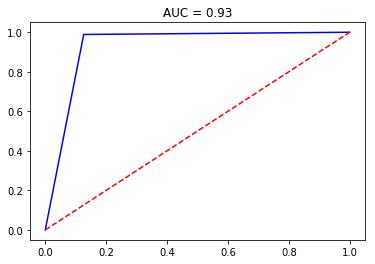

In [18]:
# conjunto train
from sklearn.svm import SVC
from sklearn.svm import SVC
svm_classifier = SVC().fit(x_train, y_train)
y_pred         = svm_classifier.predict(x_train)

metricas_modelos(y_train, y_pred)


La matriz de confusión es
[[17  6]
 [ 0 48]]
Precisión: 0.915492957746
Exactitud: 0.888888888889
Exhaustividad: 1.0
F1: 0.941176470588
AUC: 0.869565217391


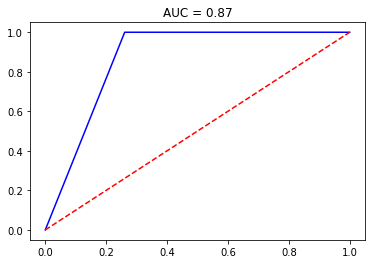

In [19]:
# conjunto test
y_pred     = svm_classifier.predict(x_test)

metricas_modelos(y_test, y_pred)

#### K-nn 3 vecinos

La matriz de confusión es
[[ 81  22]
 [  4 173]]
Precisión: 0.907142857143
Exactitud: 0.887179487179
Exhaustividad: 0.977401129944
F1: 0.930107526882
AUC: 0.881904448467


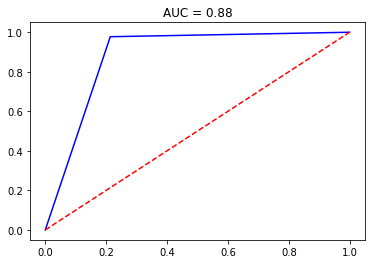

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos el modelo sin entrenar:
Knn = KNeighborsClassifier(n_neighbors = 3)


# conjunto train
Knn_classifier = Knn.fit(x_train, y_train)
y_pred     = classifier.predict(x_train)
metricas_modelos(y_train, y_pred)


La matriz de confusión es
[[12 11]
 [ 2 46]]
Precisión: 0.816901408451
Exactitud: 0.80701754386
Exhaustividad: 0.958333333333
F1: 0.87619047619
AUC: 0.740036231884


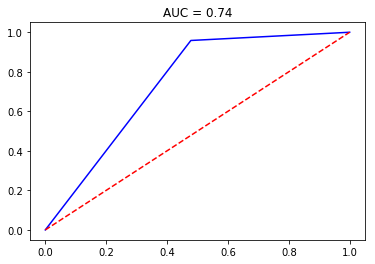

In [21]:
# conjunto test
y_pred     = Knn_classifier.predict(x_test)

metricas_modelos(y_test, y_pred)

#### K-nn 5 vecinos

La matriz de confusión es
[[ 81  22]
 [  4 173]]
Precisión: 0.907142857143
Exactitud: 0.887179487179
Exhaustividad: 0.977401129944
F1: 0.930107526882
AUC: 0.881904448467


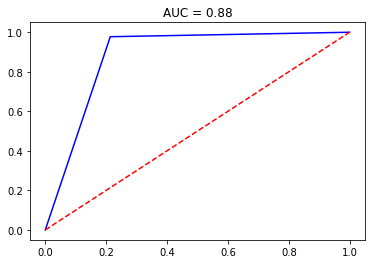

In [22]:
# Creamos el modelo sin entrenar:
Knn = KNeighborsClassifier(n_neighbors = 5)


# conjunto train
Knn_classifier = Knn.fit(x_train, y_train)
y_pred     = classifier.predict(x_train)
metricas_modelos(y_train, y_pred)

La matriz de confusión es
[[10 13]
 [ 2 46]]
Precisión: 0.788732394366
Exactitud: 0.779661016949
Exhaustividad: 0.958333333333
F1: 0.859813084112
AUC: 0.696557971014


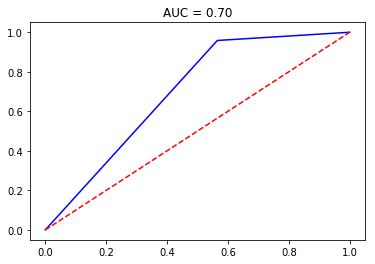

In [23]:
# conjunto test
y_pred     = Knn_classifier.predict(x_test)

metricas_modelos(y_test, y_pred)

Cuestiones:

Las respuestas se basan en los resultados obtenidos para los conjuntos test.
#### 1. ¿Qué clasificador muestra una mayor precisión?



El clasificador que muestra una mayor precisión son las Máquinas de soporte creando un hiperplano que separe de forma óptima a los puntos de una clase de la de otra, en este caso, resultado bueno o resultado malo. 

#### 2. ¿Qué clasificador muestra un menor error de tipo I?

En este caso, hay un menor número de falsos positivos en las Máquinas de soporte. 

#### 3.¿Qué clasificador muestra un menor error de tipo II?

De nuevo, hay un menor número de falsos negativos en las máquinas de soporte y regresión logística.

** nota** : Si lanzamos el código más de una vez la partición del conjunto train y test cambia entonces los resultados pueden variar en el caso del error de tipo II.